# WeatherPy
----
**Latitude Information**
1. Negative Values: Southern Hemisphere
2. 0 Value: Equator
3. Positive Values: Northern Hemisphere

### Analysis
**Latitude vs Maximum Temperature**
* Cities near the equator experience the highest maximum temperature.  As the latitude increases , the temperature drops significantly.  In general, the Southern Hemisphere have higher temperature than the Northern Hemisphere.

**Latitude vs Humidity and Latitude vs Cloudiness**
* The correlation between these 2 analysis have close to a zero correlation but the following trends are found:  
    * Almost 80% of the cities have humidity of 60% or more.
    * Majority of the cities have 0% or 80-100% clouiness.

**Latitude vs Wind Speed**
* There is no strong relationship between latitude and wind speed as the correlation is only 0.15. However, in the Northern Hemisphere, the cities that experience lower temperature have higher windspeeds of 20 mph.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
! pip install citipy

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

612


In [6]:
### Perform API Calls
#Perform a weather check on each city using a series of successive API calls.

#Perform a quick test by coming up with a list of cities with successive API calls.  
#Also, I included a list of towns and random names to test if the try & except test works before running API calls of a  list of 500+ cites. 
city_test = ['Toronto', 'Paris', 'Zagreb', 'Hoian', 'Windsor', 'Unionville', 'Mississauga', 'Hanoi', 'San Francisco', 
             'Pickering','Raptors','Mississauga', 'Darth Vader', 'Chewy']

#Find url to extract api from owm website
base_url = f"http://api.openweathermap.org/data/2.5/weather?&appid={api_key}&q="

#Create Empty List and set value at city count
city_test_list = []
city_number=1

#Include a print log of each city as it'sbeing processed (with the city number and city name).
for i in city_test:
    city_url = base_url + i
    response_test= requests.get(city_url).json()

    try:
        city_test_list.append(response_test['name'])
        print(f"Processing record {city_number} of|{i}")
        city_number +=1
        
    except:
        # Append null values
        print(f"City not found.  Skipping..")
        pass

    

Processing record 1 of|Toronto
Processing record 2 of|Paris
Processing record 3 of|Zagreb
City not found.  Skipping..
Processing record 4 of|Windsor
Processing record 5 of|Unionville
Processing record 6 of|Mississauga
Processing record 7 of|Hanoi
Processing record 8 of|San Francisco
Processing record 9 of|Pickering
City not found.  Skipping..
Processing record 10 of|Mississauga
City not found.  Skipping..
City not found.  Skipping..


In [7]:
# Create empty lists for dataframe to plot data
cityname = []
temperature_max = []
cloudiness =[]
humidity=[]
windspeed=[]
latitude=[]
longitude=[]
date=[]
country = []

print("Beginning Data Retrieval")
print("-----------------------------")

# Set value for record and set count
record = 1
set_number = 1

# Loop through the cities in the full cities list to get all the required weather information through API calls.
# Also, to get a print log of all the cities found from calling the API.



for city in cities:
    weather_url = base_url + city
    response= requests.get(weather_url + "&units=imperial").json()

    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature_max.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        print(f"Processing record {record} of set {set_number}|{city}")
        
        # record and set count
        if record > 49:
            record = 1
            set_number += 1
            cityname.append(city)
        else:
            record += 1
            cityname.append(city)
    except:
        # Append null values
        print(f"City not found.  Skipping..")
        pass
print("-----------------------------")
print("Data Retrieval Complete") 
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing record 1 of set 1|dombarovskiy
Processing record 2 of set 1|saint-augustin
Processing record 3 of set 1|port alfred
Processing record 4 of set 1|ushuaia
Processing record 5 of set 1|vardo
Processing record 6 of set 1|tasiilaq
Processing record 7 of set 1|punta arenas
Processing record 8 of set 1|dukat
Processing record 9 of set 1|aklavik
Processing record 10 of set 1|bluff
Processing record 11 of set 1|iskateley
Processing record 12 of set 1|alofi
Processing record 13 of set 1|shimoda
Processing record 14 of set 1|yellowknife
Processing record 15 of set 1|busselton
Processing record 16 of set 1|carutapera
Processing record 17 of set 1|leningradskiy
Processing record 18 of set 1|piacabucu
Processing record 19 of set 1|altay
Processing record 20 of set 1|mataura
Processing record 21 of set 1|najran
Processing record 22 of set 1|lavrentiya
Processing record 23 of set 1|mandalgovi
Processing record 24 of set 1|new norfolk
Pr

Processing record 1 of set 5|inirida
Processing record 2 of set 5|sarangani
Processing record 3 of set 5|okolona
Processing record 4 of set 5|beringovskiy
Processing record 5 of set 5|paamiut
Processing record 6 of set 5|taltal
Processing record 7 of set 5|barra do garcas
Processing record 8 of set 5|iisalmi
Processing record 9 of set 5|dale
Processing record 10 of set 5|port lincoln
Processing record 11 of set 5|sao filipe
Processing record 12 of set 5|molteno
Processing record 13 of set 5|espinosa
Processing record 14 of set 5|muli
Processing record 15 of set 5|rio grande
Processing record 16 of set 5|rocha
Processing record 17 of set 5|morondava
Processing record 18 of set 5|quatre cocos
Processing record 19 of set 5|sao joao da barra
Processing record 20 of set 5|boone
City not found.  Skipping..
Processing record 21 of set 5|pangnirtung
Processing record 22 of set 5|valdosta
Processing record 23 of set 5|talnakh
Processing record 24 of set 5|mitsamiouli
Processing record 25 of set

Processing record 48 of set 8|belmonte
Processing record 49 of set 8|fort-shevchenko
City not found.  Skipping..
Processing record 50 of set 8|camacha
Processing record 1 of set 9|hovd
Processing record 2 of set 9|floro
Processing record 3 of set 9|bileca
Processing record 4 of set 9|mae hong son
Processing record 5 of set 9|iznoski
Processing record 6 of set 9|borogontsy
Processing record 7 of set 9|lewistown
Processing record 8 of set 9|roma
Processing record 9 of set 9|ilulissat
Processing record 10 of set 9|laguna
Processing record 11 of set 9|natchez
Processing record 12 of set 9|lixourion
Processing record 13 of set 9|samarai
Processing record 14 of set 9|sinegorye
City not found.  Skipping..
Processing record 15 of set 9|goderich
Processing record 16 of set 9|polson
Processing record 17 of set 9|lazaro cardenas
Processing record 18 of set 9|sur
Processing record 19 of set 9|buenos aires
Processing record 20 of set 9|miandrivazo
Processing record 21 of set 9|muzhi
Processing reco

In [8]:
### Convert Raw Data to DataFrame
# Display the DataFrame
weather_data = pd.DataFrame({
    'City': cityname,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Latitude': latitude,
    'Longitude': longitude,
    'Max Temperature': temperature_max,
    'Windspeed': windspeed
    
})
weather_data

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Windspeed
0,dombarovskiy,0,RU,1604457256,83,50.76,59.54,35.87,9.33
1,saint-augustin,33,CA,1604457256,79,51.23,-58.65,24.87,11.25
2,port alfred,96,ZA,1604457256,89,-33.59,26.89,68.40,6.51
3,ushuaia,75,AR,1604457256,50,-54.80,-68.30,51.80,13.87
4,vardo,3,NO,1604457219,69,70.37,31.11,42.44,21.50
...,...,...,...,...,...,...,...,...,...
559,jiayuguan,7,CN,1604457328,47,39.82,98.30,44.44,2.59
560,korla,36,CN,1604457049,51,41.76,86.15,44.76,4.56
561,marquette,1,US,1604457329,61,46.53,-87.63,53.01,8.05
562,dzilam gonzalez,93,MX,1604457329,84,21.28,-88.93,73.15,8.77


In [9]:
#count the number of records by columns
weather_data.count()

City               564
Cloudiness         564
Country            564
Date               564
Humidity           564
Latitude           564
Longitude          564
Max Temperature    564
Windspeed          564
dtype: int64

In [10]:
# Export the city data into a .csv.
weather_data.to_csv("Output Files/weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

-0.706756118071058

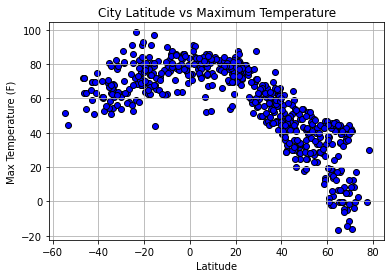

In [11]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(weather_data.iloc[:,5], weather_data.iloc[:,7], marker="o", facecolors="blue", edgecolors="black")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("City Latitude vs Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Latitude_MaxTemp")

#Calculate r-value
slope, intercept, rvalue, pvalue, stderr = linregress(weather_data.iloc[:,5], weather_data.iloc[:,7])  
rvalue

#### Latitude vs. Humidity Plot

0.1644300339805792

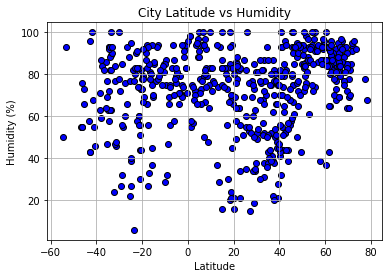

In [12]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(weather_data.iloc[:,5], weather_data.iloc[:,4], marker="o", facecolors="blue", edgecolors="black")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Latitude_Humidity")

#Calculate r-value
slope, intercept, rvalue, pvalue, stderr = linregress(weather_data.iloc[:,5], weather_data.iloc[:,4])  
rvalue

#### Latitude vs. Cloudiness Plot

0.019713878089711024

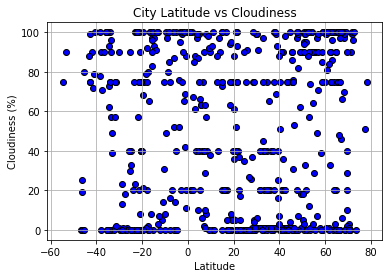

In [13]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(weather_data.iloc[:,5], weather_data.iloc[:,1], marker="o", facecolors="blue", edgecolors="black")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Latitude_Cloudiness")

#Calculate r-value
slope, intercept, rvalue, pvalue, stderr = linregress(weather_data.iloc[:,5], weather_data.iloc[:,1])  
rvalue

#### Latitude vs. Wind Speed Plot

0.09010116254765323

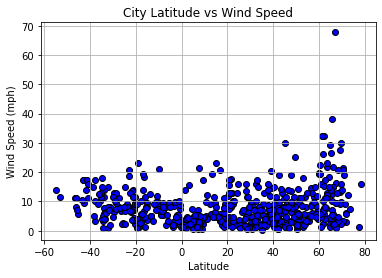

In [14]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(weather_data.iloc[:,5], weather_data.iloc[:,8], marker="o", facecolors="blue", edgecolors="black")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Latitude_WindSpeed")

#Calculate r-value
slope, intercept, rvalue, pvalue, stderr = linregress(weather_data.iloc[:,5], weather_data.iloc[:,8])  
rvalue

In [21]:
#Extracting Northern and Southern Hemisphere Dataframes
northern_hemisphere_data = weather_data[(weather_data["Latitude"] >= 0)]
southern_hemisphere_data = weather_data[(weather_data["Latitude"] < 0)]
northern_hemisphere_data

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Windspeed
0,dombarovskiy,0,RU,1604457256,83,50.76,59.54,35.87,9.33
1,saint-augustin,33,CA,1604457256,79,51.23,-58.65,24.87,11.25
4,vardo,3,NO,1604457219,69,70.37,31.11,42.44,21.50
5,tasiilaq,100,GL,1604457256,86,65.61,-37.64,33.80,38.03
7,dukat,100,RU,1604457256,96,62.55,155.55,13.84,7.31
...,...,...,...,...,...,...,...,...,...
558,jiuquan,3,CN,1604457328,45,39.74,98.52,46.13,3.98
559,jiayuguan,7,CN,1604457328,47,39.82,98.30,44.44,2.59
560,korla,36,CN,1604457049,51,41.76,86.15,44.76,4.56
561,marquette,1,US,1604457329,61,46.53,-87.63,53.01,8.05


In [23]:
# Export the city data into a .csv.
northern_hemisphere_data.to_csv("Output Files/northern_hemisphere_data.csv")
southern_hemisphere_data.to_csv("Output Files/southern_hemisphere_data.csv")

### Linear Regression

#### Northern Hemisphere - Maximum Temperature (F) vs Latitude


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(northern_hemisphere_data.iloc[:,5], northern_hemisphere_data.iloc[:,7], marker="o", facecolors="blue", edgecolors="black")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("City Latitude vs Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Latitude_MaxTemp")

#Calculate r-value
slope, intercept, rvalue, pvalue, stderr = linregress(weather_data.iloc[:,5], weather_data.iloc[:,7])  
rvalue